In [ ]:
#!pip install mat73

In [10]:
from subject import Subject
import pandas as pd
import numpy as np
import scipy as sp
from glob import glob as lsdir
from mat73 import loadmat
import os
from helper import *

exclude = ['072413_DFFR_0', '112313_DFFR_0']
behavior = load_behavior("./")
regmats = load_regressors("./")

### Loading the subjects IDs, building the subjects object with the IDs and behavioral data, and building quail eggs

In [11]:

subjects_list = [Subject(subj_ID, regmats[subj_ID], behavior[subj_ID]) for subj_ID in behavior.keys()]
for subject in subjects_list:
    subject.build_egg_subject()
for subject in subjects_list:
    print(subject.get_ID())


082813_DFFR_0
091813_DFFR_0
103013_DFFR_0
111313_DFFR_0
102313_DFFR_0
092513_DFFR_0
081513_DFFR_0
081413_DFFR_0
100913_DFFR_0
081013_DFFR_0
081713_DFFR_0
091113_DFFR_0
101713_DFFR_0
112013_DFFR_0
100213_DFFR_0
111613_DFFR_0
112113_DFFR_0
101613_DFFR_0
102013_DFFR_0
112313_DFFR_1
103013_DFFR_1
081413_DFFR_1
112013_DFFR_1


/opt/anaconda3/envs/directed-forgetting/lib/python3.10/site-packages/quail/egg.py:193: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.pres = list2pd(pres).applymap(lambda x: {'item' : np.nan} if pd.isnull(x) else x)
/opt/anaconda3/envs/directed-forgetting/lib/python3.10/site-packages/quail/egg.py:228: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return self.pres.applymap(lambda x: {k:v for k,v in x.items() if k in features} if x is not None else None)
/opt/anaconda3/envs/directed-forgetting/lib/python3.10/site-packages/quail/egg.py:195: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.rec = list2pd(rec).applymap(lambda x: {'item' : np.nan} if pd.isnull(x) else x)
/opt/anaconda3/envs/directed-forgetting/lib/python3.10/site-packages/quail/egg.py:193: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.pres = list2pd(pres).applymap(l

### Choosing a random subject to run analysis on

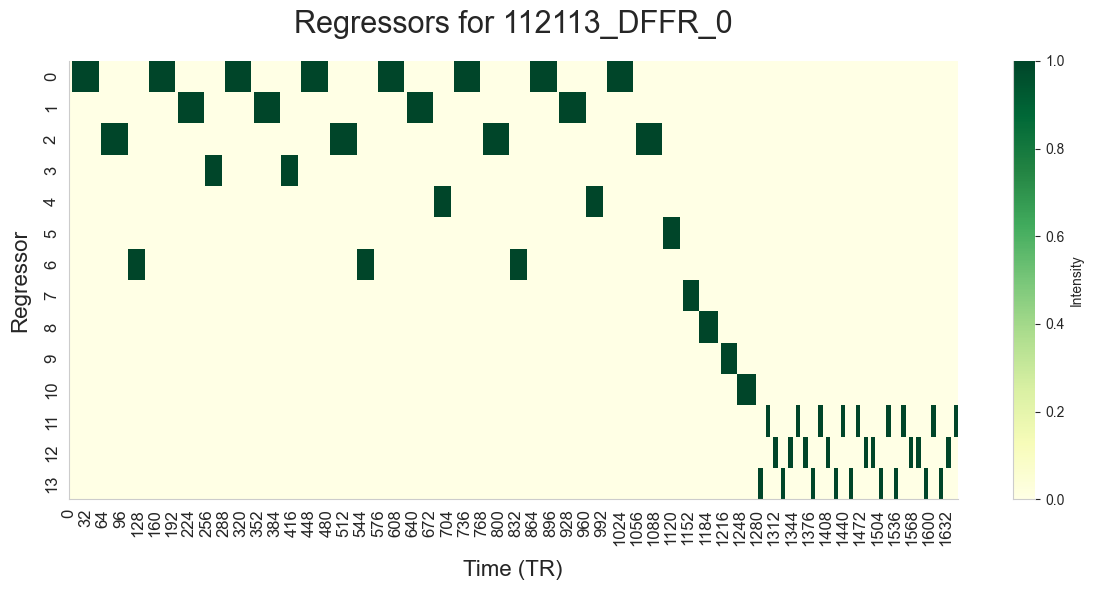

In [12]:
import random
random_subject_object = subjects_list[random.randint(0, len(subjects_list) - 1)]
random_subject_object.behavior = behavior[random_subject_object.get_ID()]
random_subject_object.display_regressors()


/opt/anaconda3/envs/directed-forgetting/lib/python3.10/site-packages/quail/egg.py:193: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.pres = list2pd(pres).applymap(lambda x: {'item' : np.nan} if pd.isnull(x) else x)
/opt/anaconda3/envs/directed-forgetting/lib/python3.10/site-packages/quail/egg.py:228: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return self.pres.applymap(lambda x: {k:v for k,v in x.items() if k in features} if x is not None else None)
/opt/anaconda3/envs/directed-forgetting/lib/python3.10/site-packages/quail/egg.py:195: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.rec = list2pd(rec).applymap(lambda x: {'item' : np.nan} if pd.isnull(x) else x)
/opt/anaconda3/envs/directed-forgetting/lib/python3.10/site-packages/quail/egg.py:193: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.pres = list2pd(pres).applymap(l

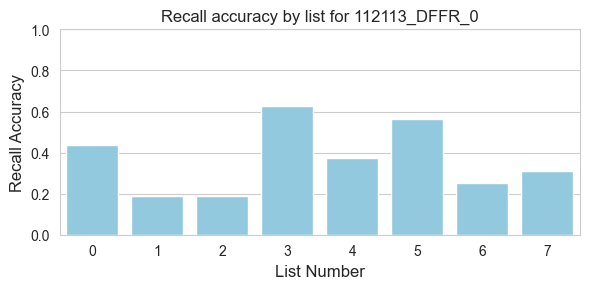

In [13]:
random_subject_object.plot_histogram_over_runs()

In [14]:
eggy = random_subject_object.egg
pres_features = eggy.get_pres_features()
pres_features

/opt/anaconda3/envs/directed-forgetting/lib/python3.10/site-packages/quail/egg.py:228: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return self.pres.applymap(lambda x: {k:v for k,v in x.items() if k in features} if x is not None else None)


0   \
Subject List                                                      
0       0     {'list': 'B', 'cuetype': 'forget', 'temporal': 0}   
        1     {'list': 'B', 'cuetype': 'remember', 'temporal...   
        2     {'list': 'B', 'cuetype': 'remember', 'temporal...   
        3     {'list': 'B', 'cuetype': 'forget', 'temporal': 0}   
        4     {'list': 'B', 'cuetype': 'remember', 'temporal...   
        5     {'list': 'B', 'cuetype': 'forget', 'temporal': 0}   
        6     {'list': 'B', 'cuetype': 'remember', 'temporal...   
        7     {'list': 'A', 'cuetype': 'forget', 'temporal': 0}   

                                                             1   \
Subject List                                                      
0       0     {'list': 'B', 'cuetype': 'forget', 'temporal': 1}   
        1     {'list': 'B', 'cuetype': 'remember', 'temporal...   
        2     {'list': 'B', 'cuetype': 'remember', 'temporal...   
        3     {'list': 'B', 'cuetype': 'forget', 'temporal': 1}   
        4     {'list': 'B', 'cuetype': 'remember', 'temporal...   
        5     {'list': 'B', 'cuetype': 'forget', 'temporal': 1}   
        6     {'list': 'B', 'cuetype': 'remember', 'temporal...   
        7     {'list': 'A', 'cuetype': 'forget', 'temporal': 1}   

                                                             2   \
Subject List                                                      
0       0     {'list': 'B', 'cuetype': 'forget', 'temporal': 2}   
        1     {'list': 'B', 'cuetype': 'remember', 'temporal...   
        2     {'list': 'B', 'cuetype': 'remember', 'temporal...   
        3     {'list': 'B', 'cuetype': 'forget', 'temporal': 2}   
        4     {'list': 'B', 'cuetype': 'remember', 'temporal...   
        5     {'list': 'B', 'cuetype': 'forget', 'temporal': 2}   
        6     {'list': 'B', 'cuetype': 'remember', 'temporal...   
        7     {'list': 'A', 'cuetype': 'forget', 'temporal': 2}   

                                                             3   \
Subject List                                                      
0       0     {'list': 'B', 'cuetype': 'forget', 'temporal': 3}   
        1     {'list': 'B', 'cuetype': 'remember', 'temporal...   
        2     {'list': 'B', 'cuetype': 'remember', 'temporal...   
        3     {'list': 'B', 'cuetype': 'forget', 'temporal': 3}   
        4     {'list': 'B', 'cuetype': 'remember', 'temporal...   
        5     {'list': 'B', 'cuetype': 'forget', 'temporal': 3}   
        6     {'list': 'B', 'cuetype': 'remember', 'temporal...   
        7     {'list': 'A', 'cuetype': 'forget', 'temporal': 3}   

                                                             4   \
Subject List                                                      
0       0     {'list': 'B', 'cuetype': 'forget', 'temporal': 4}   
        1     {'list': 'B', 'cuetype': 'remember', 'temporal...   
        2     {'list': 'B', 'cuetype': 'remember', 'temporal...   
        3     {'list': 'B', 'cuetype': 'forget', 'temporal': 4}   
        4     {'list': 'B', 'cuetype': 'remember', 'temporal...   
        5     {'list': 'B', 'cuetype': 'forget', 'temporal': 4}   
        6     {'list': 'B', 'cuetype': 'remember', 'temporal...   
        7     {'list': 'A', 'cuetype': 'forget', 'temporal': 4}   

                                                             5   \
Subject List                                                      
0       0     {'list': 'B', 'cuetype': 'forget', 'temporal': 5}   
        1     {'list': 'B', 'cuetype': 'remember', 'temporal...   
        2     {'list': 'B', 'cuetype': 'remember', 'temporal...   
        3     {'list': 'B', 'cuetype': 'forget', 'temporal': 5}   
        4     {'list': 'B', 'cuetype': 'remember', 'temporal...   
        5     {'list': 'B', 'cuetype': 'forget', 'temporal': 5}   
        6     {'list': 'B', 'cuetype': 'remember', 'temporal...   
        7     {'list': 'A', 'cuetype': 'forget', 'temporal': 5}   

                                   

### Recall accuracy for lists A and B under the two memory conditions

/opt/anaconda3/envs/directed-forgetting/lib/python3.10/site-packages/quail/egg.py:228: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return self.pres.applymap(lambda x: {k:v for k,v in x.items() if k in features} if x is not None else None)


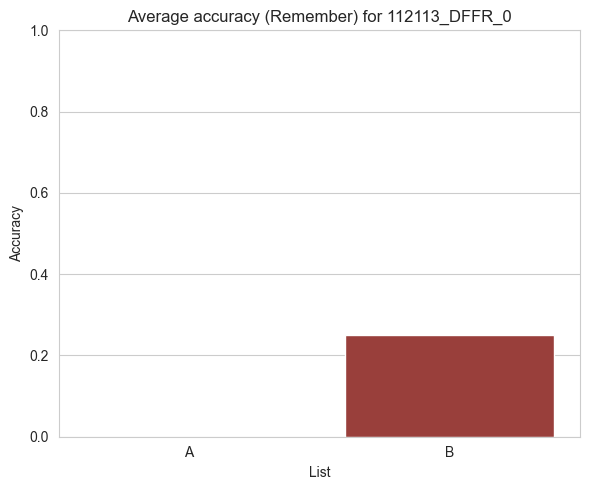

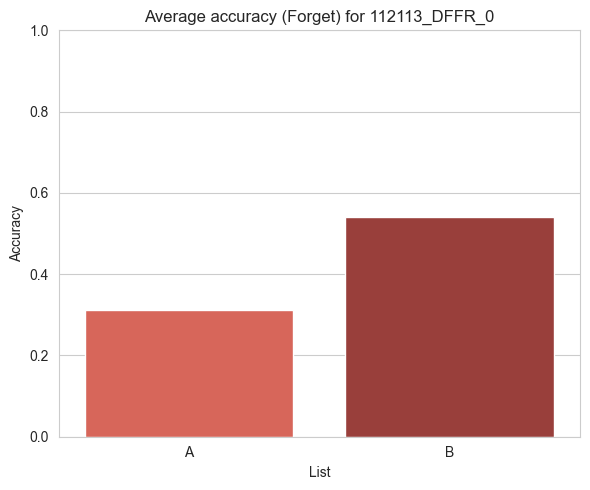

In [15]:
(
    list_A_remember_avg_accuracy,
    list_A_forget_avg_accuracy,
    list_B_remember_avg_accuracy,
    list_B_forget_avg_accuracy,
) = random_subject_object.accuracy_by_cue(plot='y')

In [ ]:
# A pandas dataframe to get the exact values
df = pd.DataFrame(
    data={
        "List A": [list_A_forget_avg_accuracy, list_A_remember_avg_accuracy],
        "List B": [list_B_forget_avg_accuracy, list_B_remember_avg_accuracy],
    },
    index=["Forget", "Remember"]
)
df

### Running the same analysis but averaging out across all subjects

In [ ]:
(
    list_A_remember_across_avg, 
    list_A_forget_across_avg, 
    list_B_remember_across_avg, 
    list_B_forget_across_avg,
) = accuracy_by_cue_across_subjects(subjects_list)

In [ ]:
# Average recall accuracy under both memory cues across all subjects
df = pd.DataFrame(
    data={
        "List A": [list_A_forget_across_avg, list_A_remember_across_avg],
        "List B": [list_B_forget_across_avg, list_B_remember_across_avg],
    },
    index=["Forget", "Remember"]
)
df

### Visualizing serial position curves for the random subject chosen

In [ ]:
random_subject_object.spc_by_list(cue_type='forget', plot='y')
random_subject_object.spc_by_list(cue_type='remember', plot='y')

### Serial position curve but averaged out across subjects

In [ ]:
spc_by_list_across_subjects(subjects_list, cue_type='remember', plot='y')
spc_by_list_across_subjects(subjects_list, cue_type='forget', plot='y')

# Testing out functions from the brain_networks module

In [ ]:
from brain_networks import *

parcellation_key_path = "./data/parcellation/Schaefer2018_1000Parcels_17Networks_order.txt"

df, cmap, color_dict = build_parcellation_key(parcellation_key_path)
df


In [ ]:
cmap

In [ ]:
color_dict

## Building parcellation mask to extract ROIs

In [ ]:
parcels_path = "./data/parcellation/Schaefer2018_1000Parcels_17Networks_order_FSLMNI152_2mm.nii.gz"
parcellation = load_parcellation_mask(parcels_path) # To extract ROIs
labelled_parcellation = create_labeled_parcellation(parcels_path, df) # To plot now

In [ ]:
print(parcellation.data.shape)

#### Plotting parcellation image

In [ ]:
plot_parcellation(labelled_parcellation, cmap)

In [ ]:
print(behavior)